In [1]:
import functools
import pickle
import warnings
import os
import collections
import tqdm
import bjp
from bjp import *
from bjp import materials, units
import concurrent.futures
import impedances
import linear
import functools

import sklearn.decomposition
import sklearn.preprocessing
import sklearn.neural_network

import gzip

In [2]:
data = numpy.load('frfs.npz')
f = data['f']
Nf = len(f)
Ls = data['Ls']
Ns = len(Ls)
frfs_by_L = data['frfs_by_L']
samples_train = data['samples_train']
frfs_train = data['frfs_train']
samples_validate = data['samples_validate']
frfs_validate = data['frfs_validate']
del data

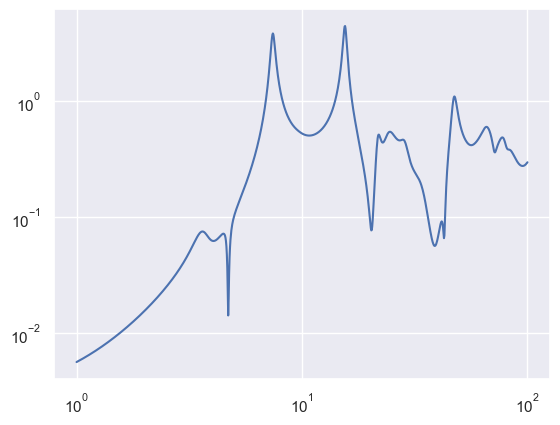

In [3]:
frf = frfs_train[0, :]

mpl.figure()
mpl.loglog(f, numpy.abs(frf))
mpl.show()

In [4]:
fb = numpy.hstack(
    (0, numpy.linspace(0.1, 200, 1001))
)
zetab = numpy.hstack(
    (-numpy.logspace(log10(0.001), log10(10), 101), numpy.logspace(log10(0.001), log10(10), 101))
)
zetab.sort()
poles = zetab[:, None]*fb[None, :] + 1j*fb[None, :]
C = 1/(1j*f[None, None, :] - poles[:, :, None])
B = C/numpy.linalg.norm(C, axis=2).reshape(C.shape[:2] + (1, ))

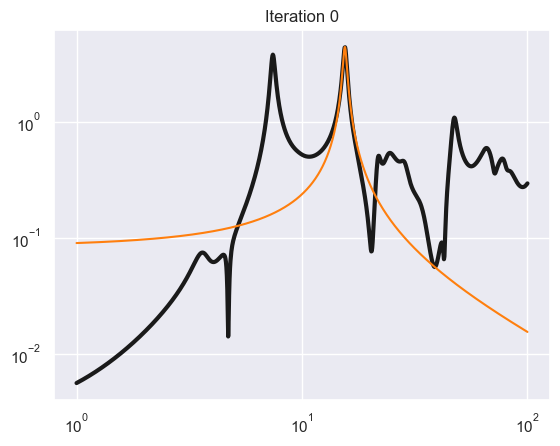

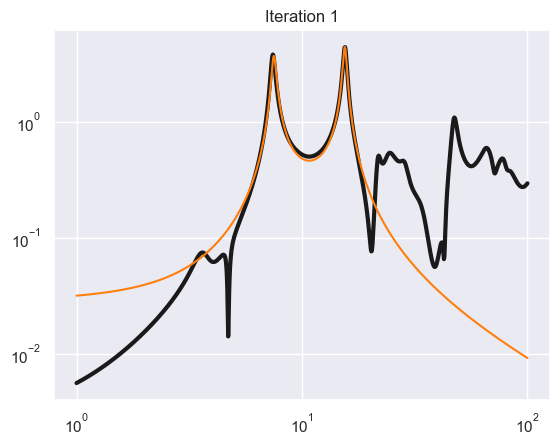

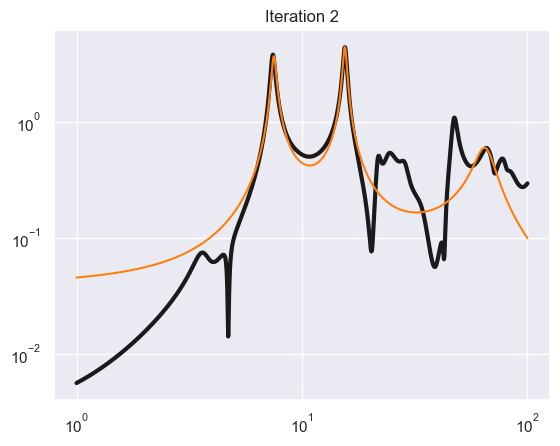

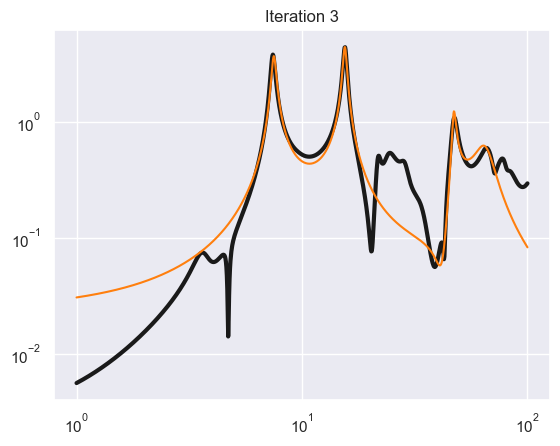

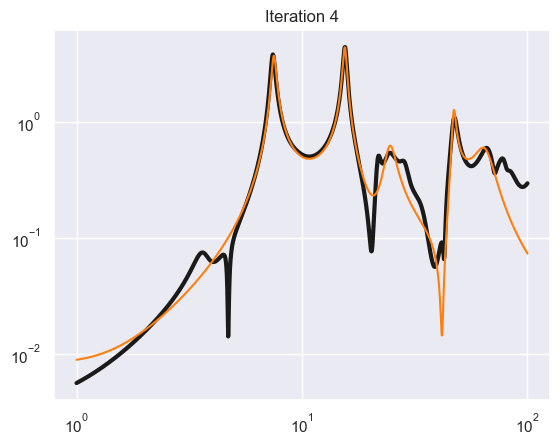

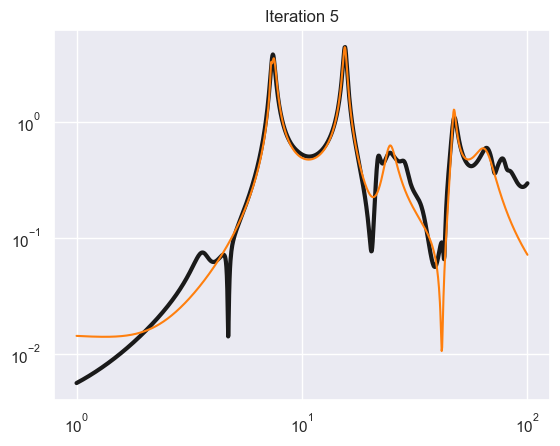

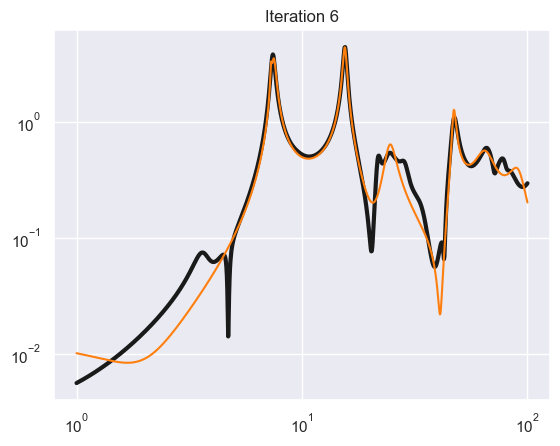

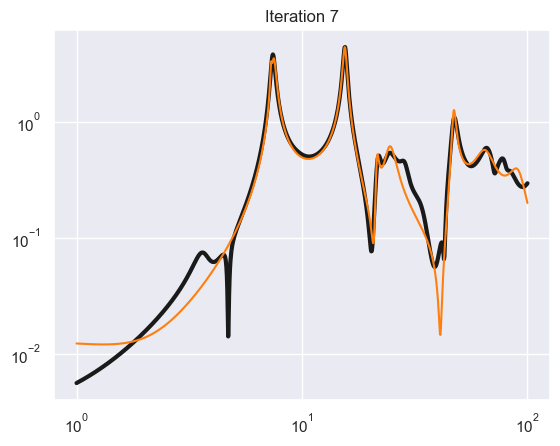

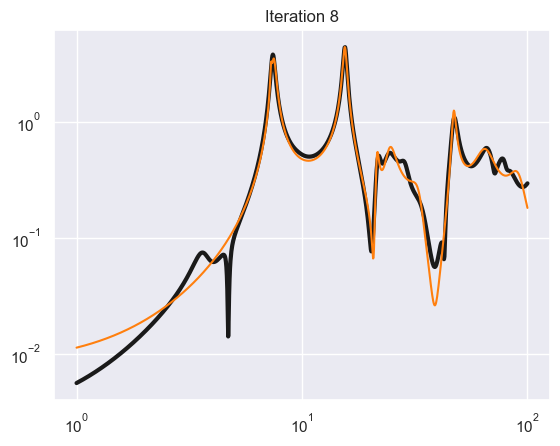

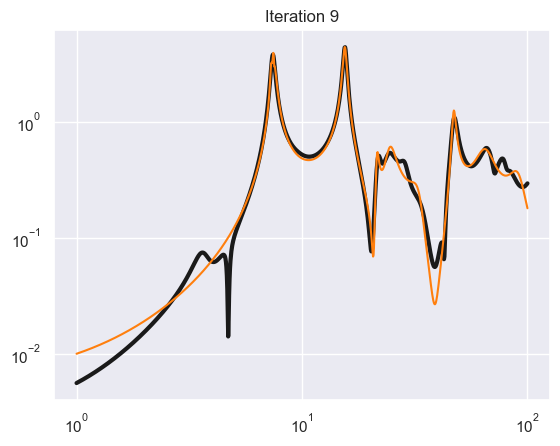

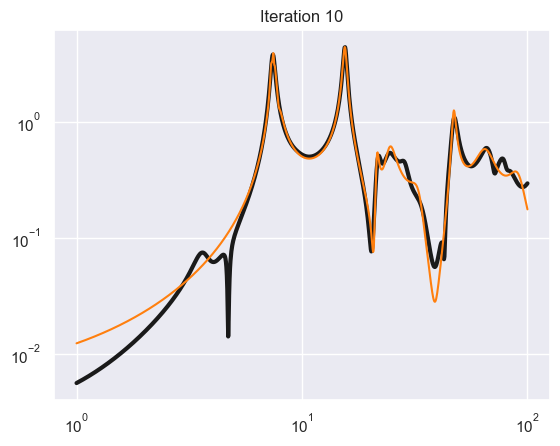

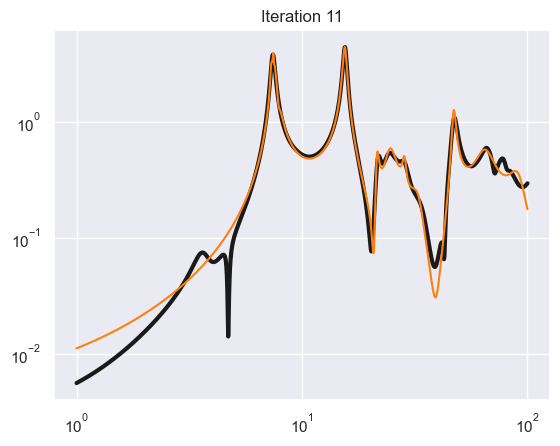

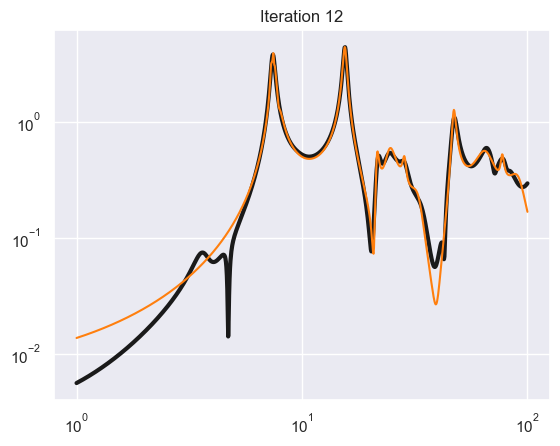

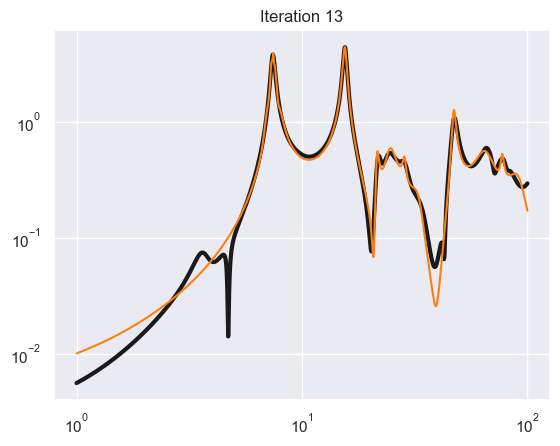

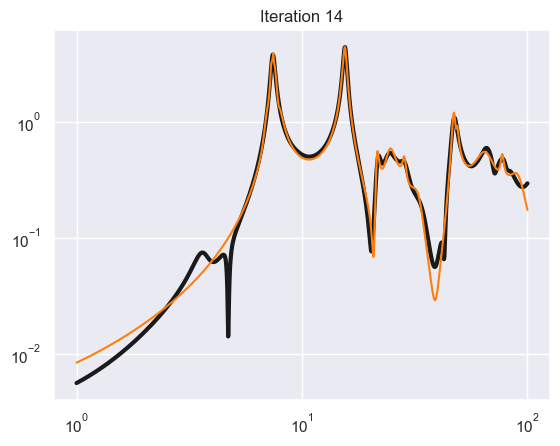

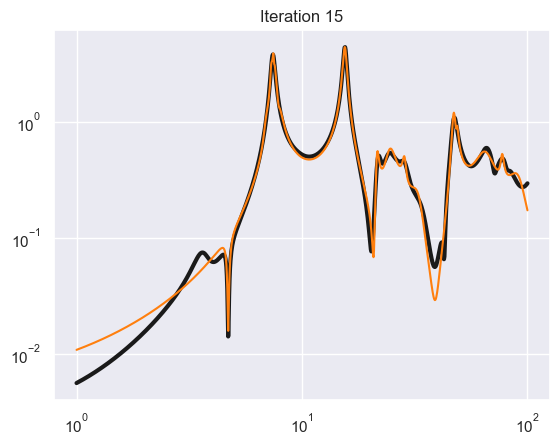

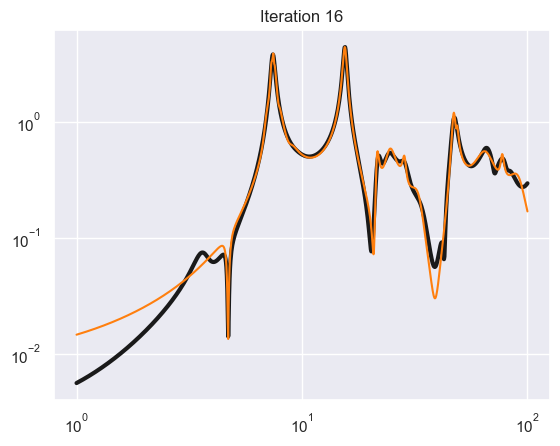

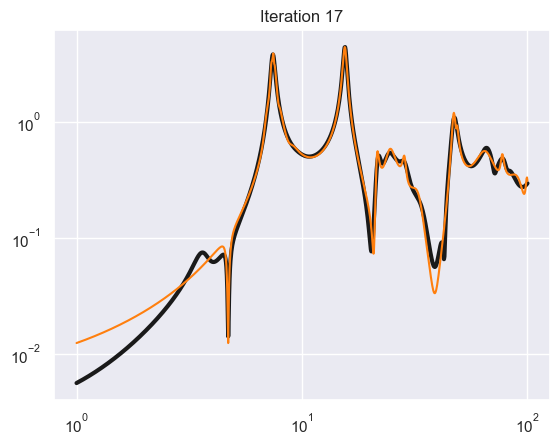

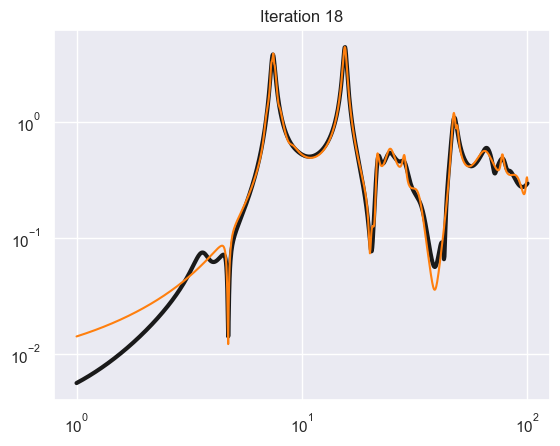

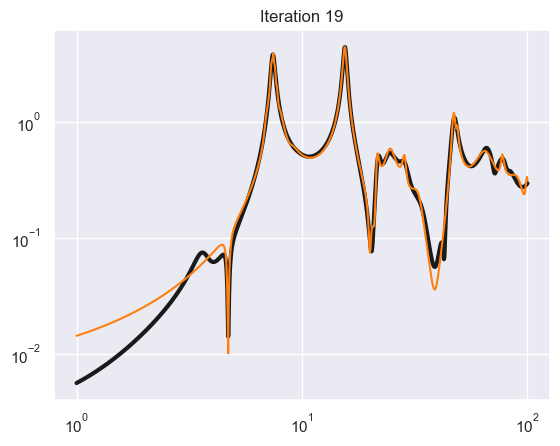

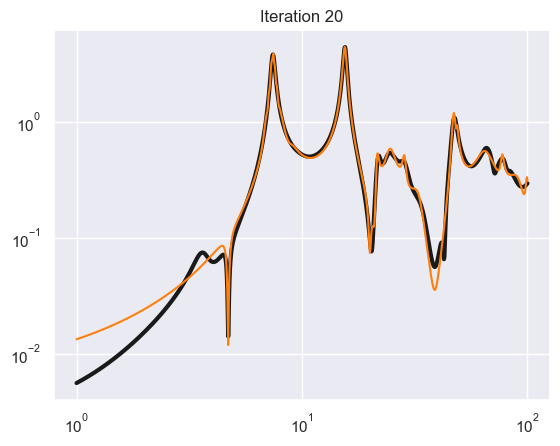

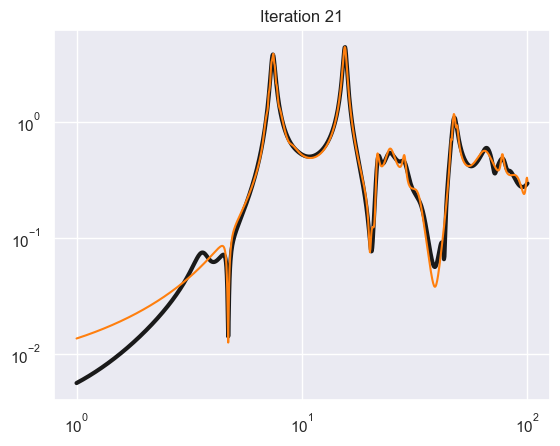

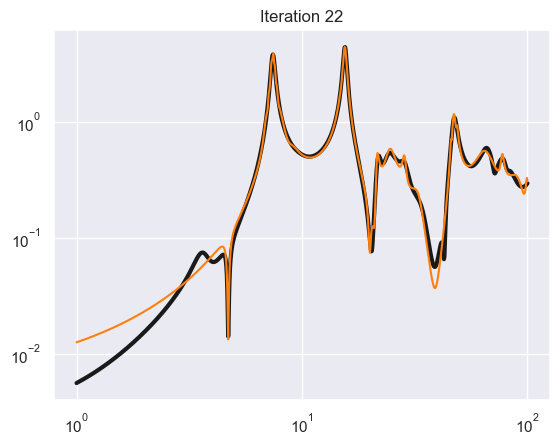

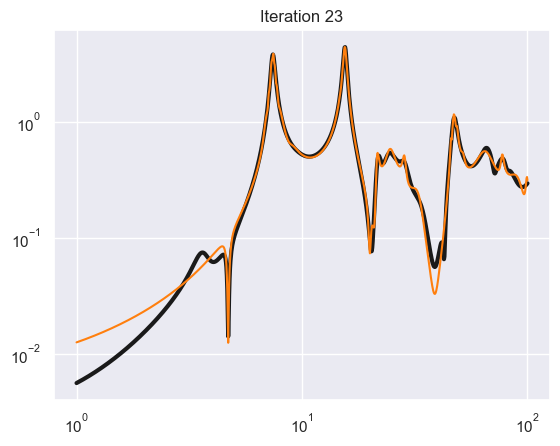

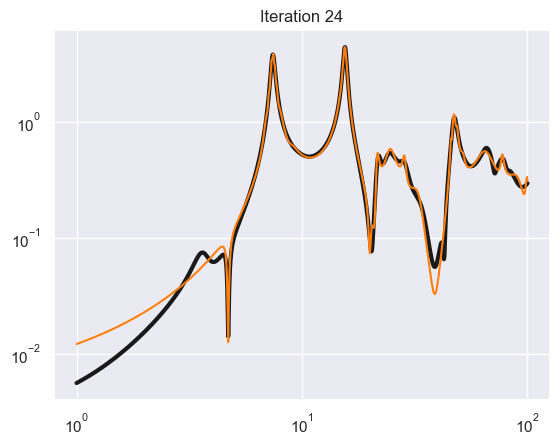

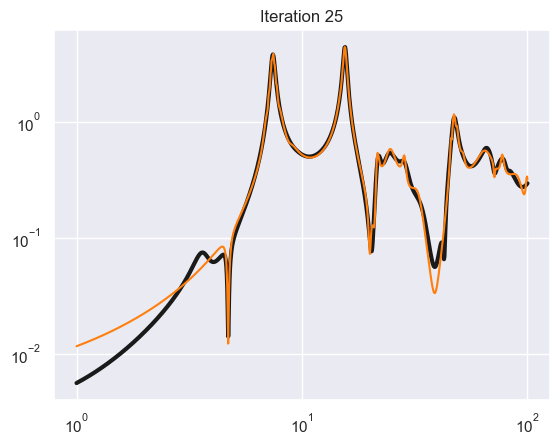

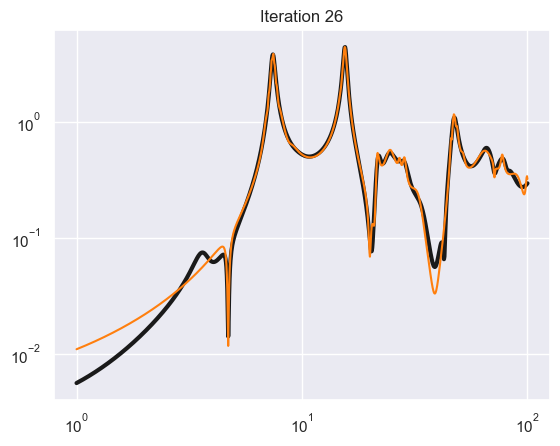

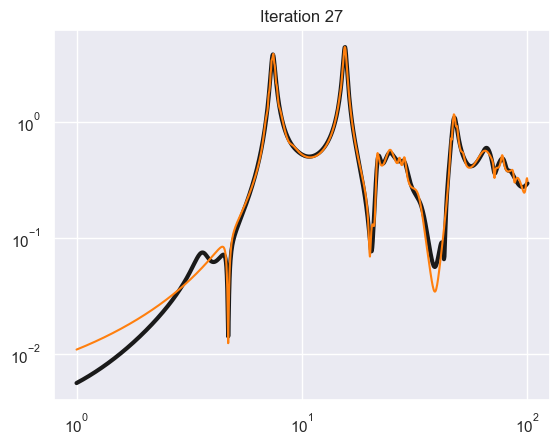

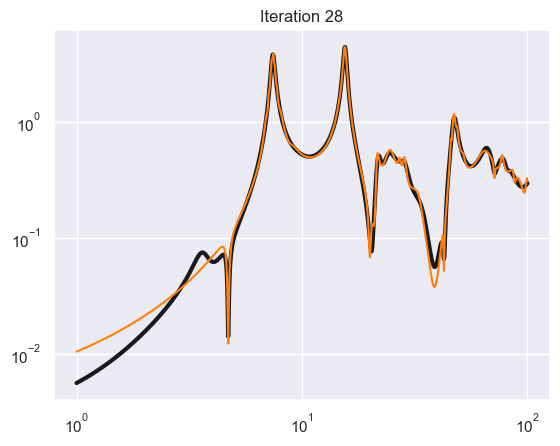

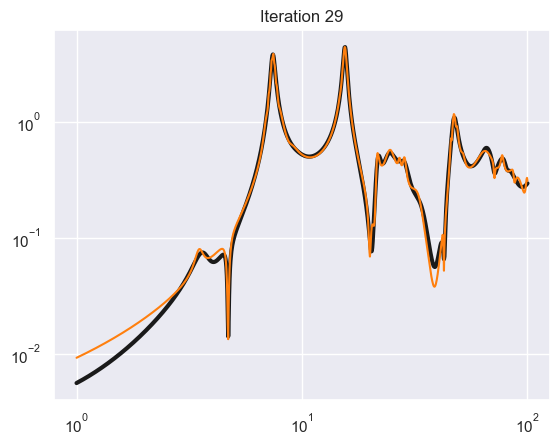

In [12]:
ib = []
jb = []
frfp = 0
for m in range(30):
    residual = frf - frfp
    D = abs(B.dot(residual.conj()))
    D[ib, jb] = 0
    i, j = numpy.unravel_index(D.argmax(), D.shape)
    ib.append(i)
    jb.append(j)
    A = C[ib, jb, :].T
    residues, _, _, _ = numpy.linalg.lstsq(A, frf, rcond=None)
    frfp = A.dot(residues)
    mpl.figure()
    mpl.title(f'Iteration {m}')
    mpl.loglog(f, abs(frf), c='k', lw=3)
    mpl.loglog(f, abs(frfp), c='tab:orange')
    mpl.show()

In [15]:
fb[jb]

array([15.4923,  7.4963, 64.6677, 47.0765, 24.4878,  7.2964, 90.8546,
       21.4893, 32.8836,  7.4963,  7.8961, 28.4858, 77.2614,  6.8966,
       48.6757,  4.6977,  8.8956, 99.4503, 20.09  ,  7.6962,  7.0965,
       45.8771, 14.8926, 51.8741,  7.2964, 71.2644, 27.0865, 87.0565,
       42.4788,  3.4983])

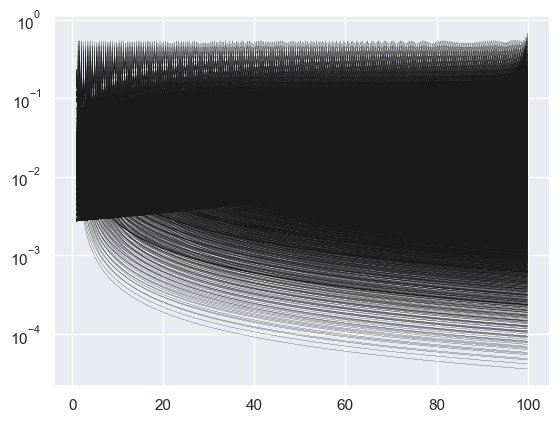

In [62]:
C.shape
mpl.figure()
mpl.semilogy(f, numpy.abs(B.reshape(-1, len(f)).T), 'k', lw=0.1)
mpl.show()

In [19]:
import pandas as pd

# Example DataFrame
data = {'Key': ['a', 'b', 'c'],
        'Value': [1, 2, 3]}

df = pd.DataFrame(data)

# Example array
new_column_values = [[4, 3], [5, 3], [6, 1]]

# Adding a new column from the array
df['New_Column'] = new_column_values

# Displaying the updated DataFrame
print(df)

  Key  Value New_Column
0   a      1     [4, 3]
1   b      2     [5, 3]
2   c      3     [6, 1]
